In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv('DSBDALExam DataSets/Iris/Iris.csv')

In [4]:
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [5]:
df.index.name = 'Id'

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica


In [7]:
df.shape

(149, 5)

# Data Cleaning

In [8]:
df.replace('?', pd.NA, inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
df.dropna(inplace=True)

In [12]:
df = df[(df[numeric_cols] >= 0).all(1)]

In [13]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica


In [14]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
np.random.seed(42)
mask=np.random.rand(*df.shape) < 0.5
df[mask] = np.nan

In [16]:
df.isna().sum()

SepalLengthCm    73
SepalWidthCm     72
PetalLengthCm    74
PetalWidthCm     71
Species          81
dtype: int64

In [17]:
df.fillna(df.mode().iloc[0], inplace=True)

In [18]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df.isna().sum().sum()

0

# Error Correcting and Outlier Removal

In [20]:
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(df.drop('Species', axis=1))
df = df[outliers == 1]

In [21]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
0,6.7,3.0,1.4,0.2,Iris-versicolor
1,6.7,3.0,1.3,0.2,Iris-setosa
2,6.7,3.1,1.5,0.2,Iris-versicolor
3,6.7,3.0,1.4,0.2,Iris-versicolor
4,5.4,3.0,1.4,0.2,Iris-versicolor
...,...,...,...,...,...
144,6.7,3.0,1.4,2.3,Iris-virginica
145,6.3,3.0,5.0,0.2,Iris-versicolor
146,6.7,3.0,5.2,2.0,Iris-versicolor


# Data Transformation

In [22]:
label_encoder = LabelEncoder()

In [23]:
X = df.drop('Species', axis=1)
y = df['Species']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train_encoded)

LogisticRegression()

In [27]:
y_pred_lr_encoded = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr_encoded)

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train_encoded)

GaussianNB()

In [29]:
y_pred_gnb_encoded = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test_encoded, y_pred_gnb_encoded)

In [30]:
cm_lr = confusion_matrix(y_test_encoded, y_pred_lr_encoded)
cr_lr = classification_report(y_test_encoded, y_pred_lr_encoded, zero_division=1)

In [31]:
cm_gnb = confusion_matrix(y_test_encoded, y_pred_gnb_encoded)
cr_gnb = classification_report(y_test_encoded, y_pred_gnb_encoded, zero_division=1)

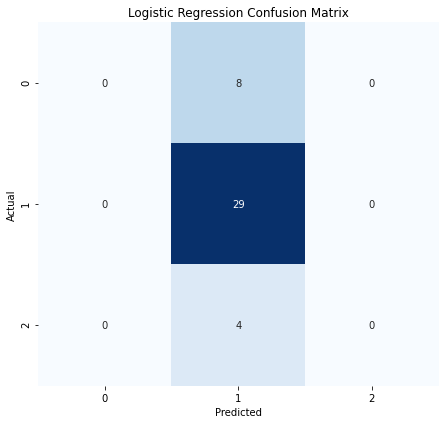

In [157]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

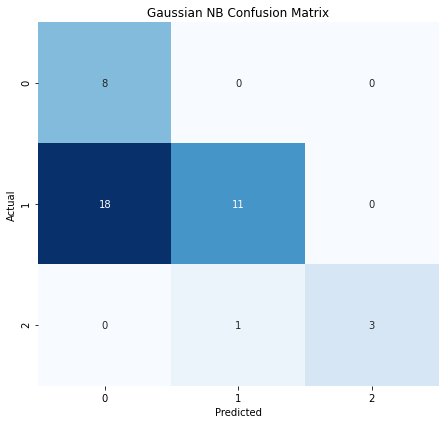

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gaussian NB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [159]:
print('Logistic Regression Classification Report: ')
print(cr_lr)

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.71      1.00      0.83        29
           2       1.00      0.00      0.00         4

    accuracy                           0.71        41
   macro avg       0.90      0.33      0.28        41
weighted avg       0.79      0.71      0.59        41



In [160]:
print('Gaussina NB Classification Report: ')
print(cr_gnb)

Gaussina NB Classification Report: 
              precision    recall  f1-score   support

           0       0.31      1.00      0.47         8
           1       0.92      0.38      0.54        29
           2       1.00      0.75      0.86         4

    accuracy                           0.54        41
   macro avg       0.74      0.71      0.62        41
weighted avg       0.81      0.54      0.55        41



In [161]:
print('Logisctic Regression Accuracy Score: ')
print(accuracy_lr*100)

Logisctic Regression Accuracy Score: 
70.73170731707317


In [162]:
print('Gaussian NB Accuracy Score: ')
print(accuracy_gnb*100)

Gaussian NB Accuracy Score: 
53.65853658536586


<Figure size 864x576 with 0 Axes>

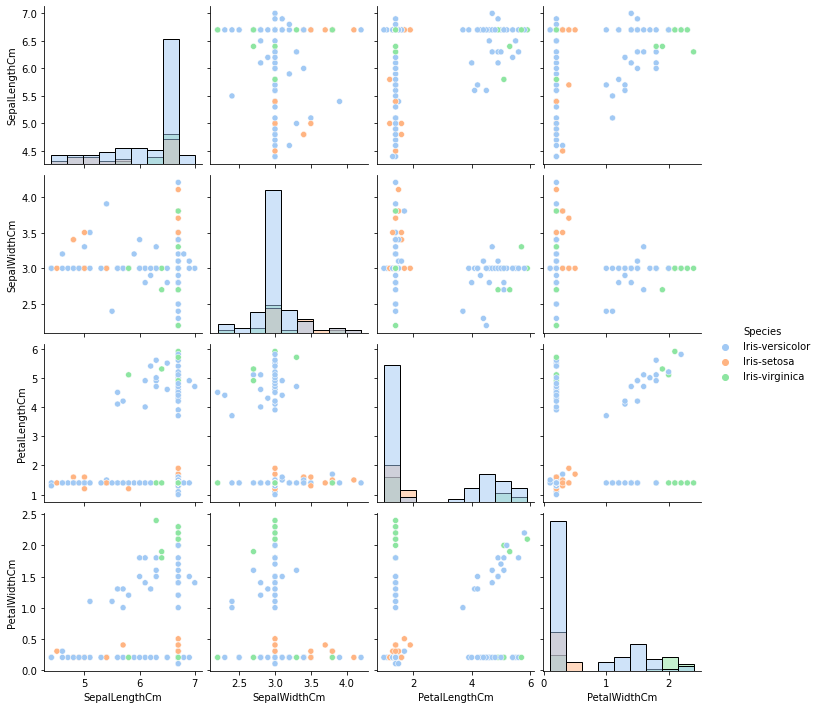

In [163]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='Species', diag_kind='hist', palette='pastel')
plt.show()

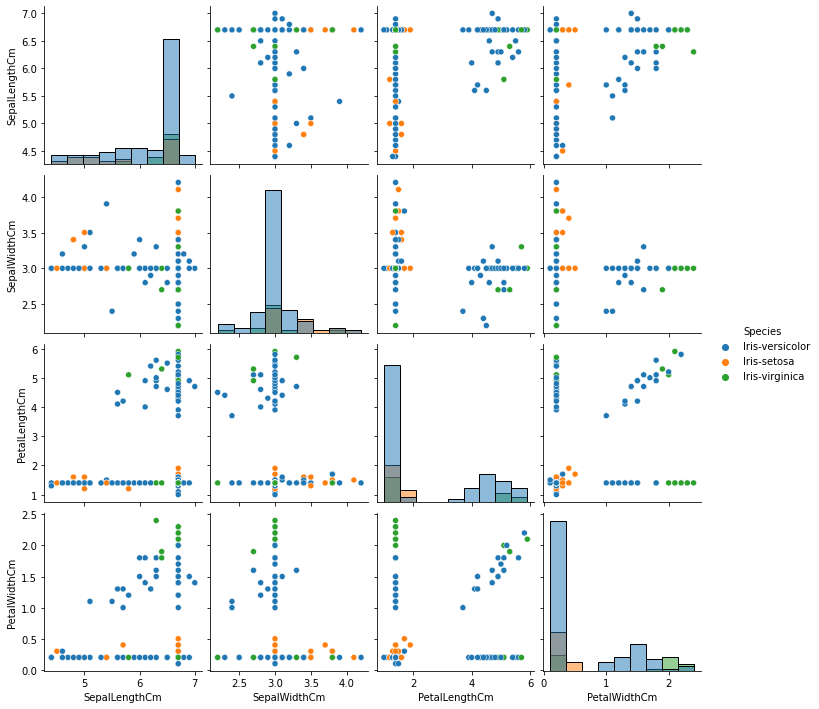

In [164]:
sns.pairplot(df, hue='Species', diag_kind='hist')
plt.show()